In [8]:
import json
import os

results_dir = "../ignored_dir/training_outputs/perceiver_snli"

# 17 - 21 21 - 26 without 22, 23 and 24, 26-28, 

# 17 - 21, 24 -> 27, 29 -> 31

# 17, 18, 19, 20, 21 gradietn checkpointing 8, learning rate 1e-6
# 24, 27 learning rate 1e-5
# 29 learning rate 5e-5
# run 29 checkpoint 4906 -> run 31 learning rate 1e-6 (turns out there is learning rate decay)



In [1]:
import json
import os

arguments = [[17, -1], [18, -1], [19, -1], [20, -1], [21, -1], [24, -1], [27, -1], [29, 4906], [31, -1]]

training_loss_record = []
learning_rate_record = []
eval_loss_record = []
eval_accuracy_record = []
results_dir = "../ignored_dir/training_outputs/perceiver_snli"
for argument in arguments:
    run_idx, opt = argument
    run_dir = os.path.join(results_dir, f"run_{run_idx}")
    # find last checkpoint or specified checkpoint
    ckpt_foldname = max(os.listdir(run_dir), key=lambda x: int(x.split('-')[-1])) if opt == -1 else f"checkpoint-{opt}"
    ckpt_path = os.path.join(run_dir, ckpt_foldname)
    if opt != -1:
        assert os.path.exists(ckpt_path), f"Specified checkpoint dir {opt} does not exist at {ckpt_path}."
    trainer_state_json_path = os.path.join(ckpt_path, "trainer_state.json")
    with open(trainer_state_json_path) as trainer_state_f:
        trainer_state_json = json.load(trainer_state_f)
    for i, e in enumerate(trainer_state_json['log_history']):
        if i % 2 == 0:
            learning_rate = e['learning_rate']
            training_loss = e['loss']
            learning_rate_record.append(learning_rate)
            training_loss_record.append(training_loss)
        else:
            eval_loss = e['eval_loss']
            eval_accuracy = e['eval_accuracy']
            eval_loss_record.append(eval_loss)
            eval_accuracy_record.append(eval_accuracy)

# learning_rate_record = [10000. * e for e in learning_rate_record]

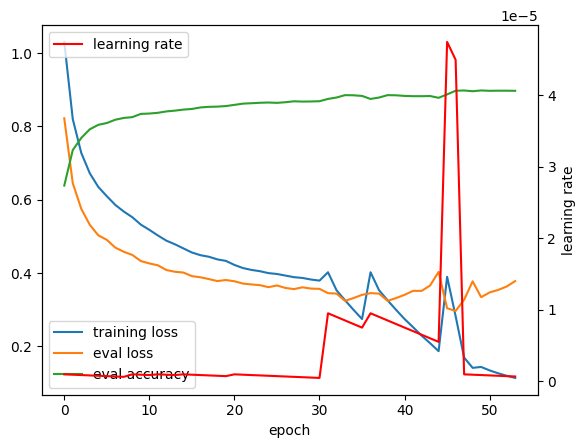

In [5]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax1.plot(training_loss_record, label="training loss")
ax1.plot(eval_loss_record, label="eval loss")
ax1.plot(eval_accuracy_record, label="eval accuracy")
ax1.set_xlabel('epoch')
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
ax2.set_ylabel('learning rate')
ax2.plot(learning_rate_record, label="learning rate", color='red')
ax2.legend()

# plt.show()
plt.savefig("perceiver_snli.png")

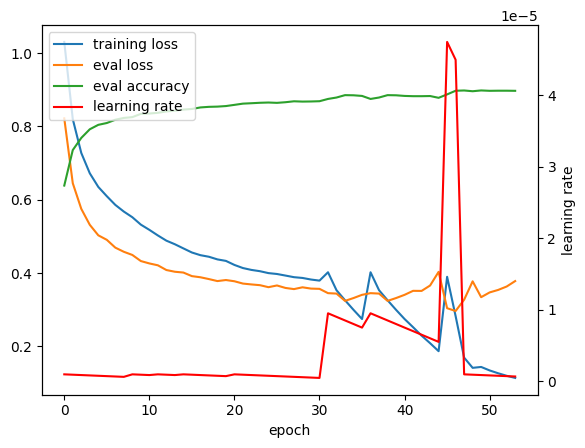

In [6]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

fig, ax1 = plt.subplots()

ax1.plot(training_loss_record, label="training loss")
ax1.plot(eval_loss_record, label="eval loss")
ax1.plot(eval_accuracy_record, label="eval accuracy")
ax1.set_xlabel('epoch')
# ax1.legend()
h1, l1 = ax1.get_legend_handles_labels()
hc1 = [e.get_color() for e in h1]

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
ax2.set_ylabel('learning rate')
ax2.plot(learning_rate_record, label="learning rate", color='red')
# ax2.legend()
h2, l2 = ax2.get_legend_handles_labels()
hc2 = [e.get_color() for e in h2]

tmp, _ = ax2.get_legend_handles_labels()
tmp = tmp[0]

colors = hc1 + hc2
labels = l1 + l2
handles = [mlines.Line2D([], []) for _ in range(len(colors))]
for i, h in enumerate(handles):
    h.update_from(tmp)
    h.set_label(labels[i])
    h.set_color(colors[i])

plt.legend(handles, labels) # , bbox_to_anchor=(2.2, 0.5)) # , colors=['blue', 'orange', 'green', 'red'])

# plt.show()
plt.savefig("perceiver_snli.png", bbox_inches = 'tight')

Perceiver More Params (512 latent vectors)

In [6]:
import json
import os

ckpt_path = "../ignored_dir/training_outputs/perceiver_snli_true_more_params/run_3/checkpoint-1530"
trainer_state_json_path = os.path.join(ckpt_path, "trainer_state.json")

with open(trainer_state_json_path) as f:
    trainer_state_json = json.load(f)

training_loss_record, eval_loss_record, learning_rate_record, eval_accuracy_record = [], [], [], []
for i, e in enumerate(trainer_state_json['log_history']):
    if i % 2 == 0:
        training_loss = e['loss']
        learning_rate = e['learning_rate']
        training_loss_record.append(training_loss)
        learning_rate_record.append(learning_rate)
    else:
        eval_loss = e['eval_loss']
        eval_accuracy = e['eval_accuracy']
        eval_loss_record.append(eval_loss)
        eval_accuracy_record.append(eval_accuracy)

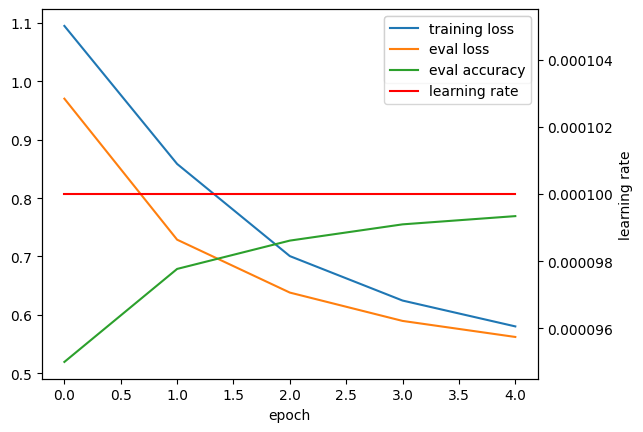

In [9]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax1.plot(training_loss_record, label="training loss")
ax1.plot(eval_loss_record, label="eval loss")
ax1.plot(eval_accuracy_record, label="eval accuracy")
ax1.set_xlabel('epoch')
ax1.legend()
h1, l1 = ax1.get_legend_handles_labels()
hc1 = [e.get_color() for e in h1]

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
ax2.set_ylabel('learning rate')
ax2.plot(learning_rate_record, label="learning rate", color='red')
ax2.legend()
h2, l2 = ax2.get_legend_handles_labels()
hc2 = [e.get_color() for e in h2]

tmp, _ = ax2.get_legend_handles_labels()
tmp = tmp[0]

colors = hc1 + hc2
labels = l1 + l2
handles = [mlines.Line2D([], []) for _ in range(len(colors))]
for i, h in enumerate(handles):
    h.update_from(tmp)
    h.set_label(labels[i])
    h.set_color(colors[i])

plt.legend(handles, labels) # , bbox_to_anchor=(2.2, 0.5)) # , colors=['blue', 'orange', 'green', 'red'])

# plt.show()
plt.savefig("perceiver_snli_more_param.png", bbox_inches = 'tight')